## 本筆記重點如下：
* 1.自動化分類影像資料夾
* 2.小資料集的訓練重點
* 3.使用pretrained model的技巧：卷積基底+分類、微調 (fine-tuning)

## 實作步驟
* Step1.載入基本套件與資料
* Step2.觀察資料
* Step3.資料前處理
* Step4.建立模型
* Step5.模型訓練
* Step6.訓練成效檢視
* 使用 pretrained model

實作前準備：配置GPU

In [1]:
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto() #TF創建session時，對session進行配置
config.gpu_options.allocator_type = 'BFC' #A "Best-fit with coalescing" algorithm, simplified from a version of dlmalloc.
config.gpu_options.per_process_gpu_memory_fraction = 0.3 #占用0.3的顯卡記憶體
config.gpu_options.allow_growth = True #不佔用所有記憶體，按需要分配
set_session(tf.Session(config=config)) 

Using TensorFlow backend.


### Step1.載入基本套件與資料

In [2]:
#載入基本套件
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import os, shutil

#專案的根目錄路徑
ROOT_DIR = os.getcwd()

#置放訓練圖像與標註資料的位置
DATA_PATH = os.path.join(ROOT_DIR,'dogs-vs-cats')

#存儲小數據集的目錄
base_dir = os.path.join(DATA_PATH, 'cats_and_dogs_small')
print(base_dir)

#如果目錄不存在，就建立目錄
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
#訓練資料的目錄    
train_dir = os.path.join(base_dir, 'train') #將訓練資料目錄加到 base_dir 目錄中
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

#驗證資料的目錄 
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

#測試資料的目錄 
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

#貓圖片訓練目錄
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
    
#狗圖片訓練目錄
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)    

#貓的圖片的驗證資料目錄
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

#狗的圖片的驗證資料目錄
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

#貓的圖片的測試資料目錄
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

#狗的圖片的測試資料目錄
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

C:\Users\reclu\Downloads\dogs_cats\dogs-vs-cats\cats_and_dogs_small


In [3]:
#自動化處理圖像的技巧
'''
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy next 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)
'''

"\n# Copy first 1000 cat images to train_cats_dir\nfnames = ['cat.{}.jpg'.format(i) for i in range(1000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(train_cats_dir, fname)\n    shutil.copyfile(src, dst)\n\n# Copy next 500 cat images to validation_cats_dir\nfnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(validation_cats_dir, fname)\n    shutil.copyfile(src, dst)\n    \n# Copy next 500 cat images to test_cats_dir\nfnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path.join(test_cats_dir, fname)\n    shutil.copyfile(src, dst)\n    \n# Copy first 1000 dog images to train_dogs_dir\nfnames = ['dog.{}.jpg'.format(i) for i in range(1000)]\nfor fname in fnames:\n    src = os.path.join(original_dataset_dir, fname)\n    dst = os.path

### Step2.觀察資料

In [4]:
#檢視各路徑中的圖片數量
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('total test cat images:', len(os.listdir(test_cats_dir)))
print('total test dog images:', len(os.listdir(test_dogs_dir)))

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
total test cat images: 500
total test dog images: 500


### Step3.資料前處理

In [5]:
from keras.preprocessing.image import ImageDataGenerator

#設定訓練與測試資料產生器，並將像素值壓縮到[0,1]
train_datagen = ImageDataGenerator(rescale = 1./255) 
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
#train_dir位置為目標目錄
#target_size為將圖片調整成指定大小，此處為150*150
#batch_size 每個批次量產生20個樣本
#class_mode為類別模式，因為本例使用 binary_crossentropy 作為損失值，所以需要二元標籤

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

#因為產生器會不停地產生樣本，因此會調整模型來使用批次產生器

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### Step4.建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Activation, Dropout

model = Sequential() #宣告模型型式
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #分類層

model.summary() #檢視模型





_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
______

In [7]:
#編譯模型
from keras.optimizers import RMSprop
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=1e-4) ,metrics = ['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [8]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50)

#step_per_epoch 從產生器抽取100個批次量。因為目標設定要接觸2000個樣本，每個批次量為20個樣本，因此step_per_epoch設定為100。
#validation_steps = 50 。從驗證產生器抽取1000個樣本。

model.save('CatsAndDogsSmall_1.h5')



Epoch 1/30




100/100 [==============================] - 14s 141ms/step - loss: 0.6823 - acc: 0.5550 - val_loss: 0.6614 - val_acc: 0.5800
Epoch 2/30
100/100 [==============================] - 5s 52ms/step - loss: 0.6491 - acc: 0.6100 - val_loss: 0.6758 - val_acc: 0.5270
Epoch 3/30
100/100 [==============================] - 5s 52ms/step - loss: 0.5920 - acc: 0.6805 - val_loss: 0.6120 - val_acc: 0.6660
Epoch 4/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5569 - acc: 0.7165 - val_loss: 0.7165 - val_acc: 0.6290
Epoch 5/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5362 - acc: 0.7320 - val_loss: 0.6204 - val_acc: 0.6610
Epoch 6/30
100/100 [==============================] - 5s 51ms/step - loss: 0.5112 - acc: 0.7460 - val_loss: 0.6563 - val_acc: 0.6600
Epoch 7/30
100/100 [==============================] - 5s 52ms/step - loss: 0.4860 - acc: 0.7695 - val_loss: 0.5467 - val_acc: 0.7250
Epoch 8/30
100/100 [==============================] - 5s 51ms

#### 備註
fit_generator用法：


fit_generator(self, generator, steps_per_epoch, epochs=1, verbose=1, callbacks=None, validation_data=None, validation_steps=None, class_weight=None, max_q_size=10, workers=1, pickle_safe=False, initial_epoch=0)

source : https://keras-cn.readthedocs.io/en/latest/models/model/

### Step6.訓練成效檢視

In [9]:
history_dict = history.history #取得history中的所有物件
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

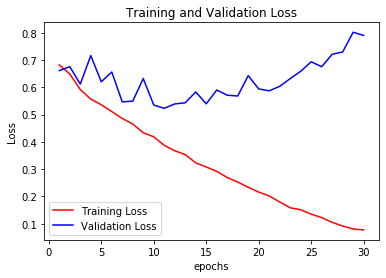

In [10]:
# 訓練與驗證分數的可視化
loss_values = history_dict['loss'] #取得每輪訓練所得的loss值
val_loss_values = history_dict['val_loss'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(loss_values)+1) #訓練次數1~20

plt.plot(epochs, loss_values, 'r', label='Training Loss') #繪製 training loss 的圖形
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') #繪製 validation loss的圖形
plt.title('Training and Validation Loss') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Loss') #設定y軸名稱為 loss
plt.legend() #設定圖例
plt.show() #顯示圖形

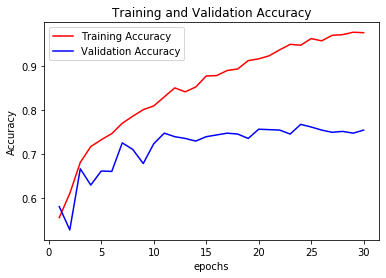

In [11]:
# plt.clf()  #清除圖表
acc_values = history_dict['acc'] #取得每輪訓練所得的loss值
val_acc_values = history_dict['val_acc'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(acc_values)+1) #訓練次數1~20

plt.plot(epochs, acc_values, 'r', label='Training Accuracy') #繪製 training Accuracy 的圖形
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy') #繪製 validation Accuracy的圖形
plt.title('Training and Validation Accuracy') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Accuracy') #設定y軸名稱為 Accuracy
plt.legend() #設定圖例
plt.show() #顯示圖形

從結果來看，大約在epochs=3時，就發生overfitting的現象。可見2000筆資料仍過少，因此接下來可透過資料擴增法，來試著改善overfitting的現象。

#### 方法1.圖像擴增

In [12]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')
#各參數意義
#rotation_range 旋轉角度 0~180
#width_shift_range 水平平移影像，值為百分比
#height_shift_range 垂直平移影像，值為百分比
#shear_range 隨機傾斜，值為順時針傾斜角度
#zoom_range 隨機縮放影像，值為縮放百分比
#horizontal_flip 水平翻轉
#fill_mode 影像出現空白時的填值方法

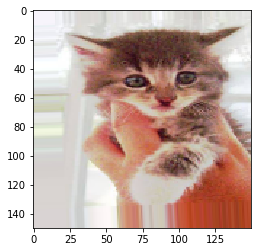

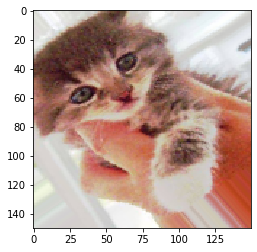

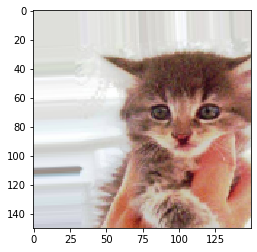

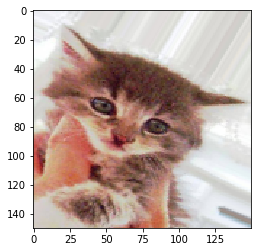

In [13]:
#顯示隨機擴充影像

from keras.preprocessing import image
fnames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]
img_path = fnames[3] #任選一張影像擴充
img = image.load_img(img_path, target_size=(150, 150)) #讀取影像，並調整尺寸為150*150

x = image.img_to_array(img) #將影像轉換成150*150*3 的numpy array
x = x.reshape((1,)+x.shape) #調整成shape = (1, 150, 150, 3)

#產生批次影像，預設為無限循環，所以設定在第4次停止
i=0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i % 4 == 0:
        break

plt.show()        

In [14]:
from keras.layers import Dropout

model = Sequential() #宣告模型型式
model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid')) #分類層

model.summary() #檢視模型


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 17, 17, 128)       0         
__________________________

In [15]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=1e-4) ,metrics = ['acc'])

In [16]:
#設定訓練與測試資料產生器，並將像素值壓縮到[0,1]
train_datagen = ImageDataGenerator(rescale = 1./255,rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, 
                             shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest') 
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')
#train_dir位置為目標目錄
#target_size為將圖片調整成指定大小，此處為150*150
#batch_size 每個批次量產生32個樣本
#class_mode為類別模式，因為本例使用 binary_crossentropy 作為損失值，所以需要二元標籤

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 32, class_mode = 'binary')

#因為產生器會不停地產生樣本，因此會調整模型來使用批次產生器

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [17]:
history = model.fit_generator(train_generator, steps_per_epoch = 100, epochs = 30, validation_data = validation_generator, validation_steps = 50)

model.save('CatsAndDogsSmall_dataGen.h5')

Epoch 1/30
100/100 [==============================] - 21s 211ms/step - loss: 0.6906 - acc: 0.5237 - val_loss: 0.6868 - val_acc: 0.5082
Epoch 2/30
100/100 [==============================] - 19s 189ms/step - loss: 0.6769 - acc: 0.5669 - val_loss: 0.6495 - val_acc: 0.6057
Epoch 3/30
100/100 [==============================] - 19s 190ms/step - loss: 0.6603 - acc: 0.5994 - val_loss: 0.6393 - val_acc: 0.6231
Epoch 4/30
100/100 [==============================] - 19s 190ms/step - loss: 0.6451 - acc: 0.6216 - val_loss: 0.6249 - val_acc: 0.6424
Epoch 5/30
100/100 [==============================] - 19s 191ms/step - loss: 0.6302 - acc: 0.6372 - val_loss: 0.5898 - val_acc: 0.6688
Epoch 6/30
100/100 [==============================] - 19s 191ms/step - loss: 0.6052 - acc: 0.6700 - val_loss: 0.5924 - val_acc: 0.6772
Epoch 7/30
100/100 [==============================] - 19s 190ms/step - loss: 0.5943 - acc: 0.6794 - val_loss: 0.5929 - val_acc: 0.6694
Epoch 8/30
100/100 [==============================] - 1

In [18]:
history_dict = history.history #取得history中的所有物件
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

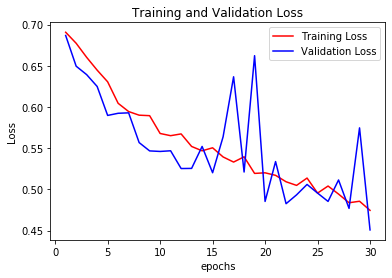

In [19]:
# 訓練與驗證分數的可視化
loss_values = history_dict['loss'] #取得每輪訓練所得的loss值
val_loss_values = history_dict['val_loss'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(loss_values)+1) #訓練次數1~20

plt.plot(epochs, loss_values, 'r', label='Training Loss') #繪製 training loss 的圖形
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') #繪製 validation loss的圖形
plt.title('Training and Validation Loss') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Loss') #設定y軸名稱為 loss
plt.legend() #設定圖例
plt.show() #顯示圖形

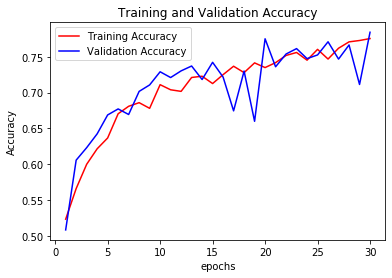

In [20]:
# plt.clf()  #清除圖表
acc_values = history_dict['acc'] #取得每輪訓練所得的loss值
val_acc_values = history_dict['val_acc'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(acc_values)+1) #訓練次數1~20

plt.plot(epochs, acc_values, 'r', label='Training Accuracy') #繪製 training Accuracy 的圖形
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy') #繪製 validation Accuracy的圖形
plt.title('Training and Validation Accuracy') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Accuracy') #設定y軸名稱為 Accuracy
plt.legend() #設定圖例
plt.show() #顯示圖形

#### 方法2.載入預訓練model

* 1.特徵萃取
* 2.微調

#### 1.卷積基底：特徵萃取 + 串接新的Dense分類層 >> 重新訓練

In [21]:
from keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (150, 150, 3))
#weight >> 卷積基底的權重模型資訊
#include_top = False >> 不包含分類器
#輸入網路的影像張量shape

In [22]:
#extract features with pre-trained model
import os 
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

#取得訓練、驗證、測試資料夾的路徑
#專案的根目錄路徑
ROOT_DIR = os.getcwd()

#置放訓練圖像與標註資料的位置
DATA_PATH = os.path.join(ROOT_DIR,'dogs-vs-cats')

#存儲小數據集的目錄
base_dir = os.path.join(DATA_PATH, 'cats_and_dogs_small')
print(base_dir)

#如果目錄不存在，就建立目錄
if not os.path.exists(base_dir):
    os.mkdir(base_dir)
    
#訓練資料的目錄    
train_dir = os.path.join(base_dir, 'train') #將訓練資料目錄加到 base_dir 目錄中
if not os.path.exists(train_dir):
    os.mkdir(train_dir)

#驗證資料的目錄 
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
    
#測試資料的目錄 
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)    

datagen = ImageDataGenerator(1./255)
batch_size = 20

#影像特徵提取
def extract_feature(directory, sample_count): #影像目錄、要處理的影像數
    features = np.zeros(shape=(sample_count, 4, 4, 512)) #根據VGG16(卷積基底)的最後一層的輪出張量規格
    labels = np.zeros(shape=(sample_count)) #要處理的影像數
    
    #"圖像資料產生器", 每呼叫它一次, 它會吐出特定批次數的影像資料
    generator = datagen.flow_from_directory(
        directory, 
        target_size=(150, 150), # 設定圖像的高(height)與寬(width)
        batch_size = batch_size, # 設定每次產生的影像的數據批量
        class_mode='binary') #因目標資料集只有兩類(cat & dog)，所以class_mode選擇binary
    
    # 把訓練資料集所有的影像都跑過一次
    i=0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch) # 透過“卷積基底”來萃取影像特徵
        features[i * batch_size : (i + 1) * batch_size] = features_batch # 把特徴先存起來
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch #把標籤先存起來
        i+=1
        print(i,end=' ') #印出 i 來檢視進度
        
        #當萃取樣本數超過設定的樣本數
        if i * batch_size >= sample_count:
            break
    print('extract_features complete!')
    return features, labels

train_features, train_labels = extract_feature(train_dir, 2000) #訓練資料的影像特徵萃取
validation_features, validation_labels = extract_feature(validation_dir, 1000) #驗證資料的影像特徵萃取
test_features, test_labels = extract_feature(test_dir, 1000) #測試資料的影像特徵萃取

#提取的特徵是（樣本數，4，4，512）的形狀。要將它們餵給一個密集連接(densely-connected)的分類器，
#所以必須把它們壓扁(flatten)成（樣本數, 8192）
train_features = np.reshape(train_features,(2000, 4*4*512))
validation_features = np.reshape(validation_features,(1000, 4*4*512))
test_features = np.reshape(test_features,(1000, 4*4*512))

C:\Users\reclu\Downloads\dogs_cats\dogs-vs-cats\cats_and_dogs_small
Found 2000 images belonging to 2 classes.


C:\Users\reclu\Anaconda3\envs\myenv\lib\site-packages\keras_preprocessing\image\image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 extract_features complete!
Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 extract_features complete!
Found 1000 images belonging to 2 classes.
1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 extract_features complete!


In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Activation, Dropout
from keras import optimizers

model = Sequential() #宣告模型型式
model.add(Dense(256, activation = 'relu', input_dim = 4*4*512))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid')) #分類層

model.summary() #檢視模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 257       
Total params: 2,097,665
Trainable params: 2,097,665
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=2e-5), metrics = ['acc'])

# 把透過預處理的卷積基底所提取的特徵做為input來進行訓練
history = model.fit(train_features, train_labels, 
                    epochs = 30, 
                    batch_size = 20, 
                    validation_data = (validation_features, validation_labels))

Train on 2000 samples, validate on 1000 samples
Epoch 1/30
2000/2000 [==============================] - 1s 384us/step - loss: 3.8219 - acc: 0.6825 - val_loss: 1.1511 - val_acc: 0.8740
Epoch 2/30
2000/2000 [==============================] - 0s 233us/step - loss: 1.9560 - acc: 0.8170 - val_loss: 0.9151 - val_acc: 0.9050
Epoch 3/30
2000/2000 [==============================] - 0s 233us/step - loss: 1.4399 - acc: 0.8700 - val_loss: 0.8294 - val_acc: 0.9130
Epoch 4/30
2000/2000 [==============================] - 0s 233us/step - loss: 1.1038 - acc: 0.8905 - val_loss: 0.7564 - val_acc: 0.9150
Epoch 5/30
2000/2000 [==============================] - 0s 231us/step - loss: 0.9563 - acc: 0.9050 - val_loss: 0.7827 - val_acc: 0.9200
Epoch 6/30
2000/2000 [==============================] - 0s 235us/step - loss: 0.8258 - acc: 0.9210 - val_loss: 0.7041 - val_acc: 0.9290
Epoch 7/30
2000/2000 [==============================] - 0s 232us/step - loss: 0.7879 - acc: 0.9255 - val_loss: 0.6971 - val_acc: 0.9270


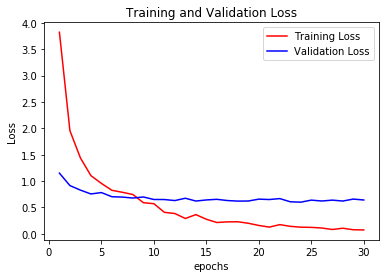

In [25]:
history_dict = history.history #取得history中的所有物件
history_dict.keys()

# 訓練與驗證分數的可視化
loss_values = history_dict['loss'] #取得每輪訓練所得的loss值
val_loss_values = history_dict['val_loss'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(loss_values)+1) #訓練次數1~20

plt.plot(epochs, loss_values, 'r', label='Training Loss') #繪製 training loss 的圖形
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') #繪製 validation loss的圖形
plt.title('Training and Validation Loss') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Loss') #設定y軸名稱為 loss
plt.legend() #設定圖例
plt.show() #顯示圖形

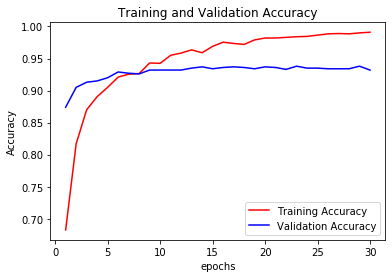

In [26]:
acc_values = history_dict['acc'] #取得每輪訓練所得的loss值
val_acc_values = history_dict['val_acc'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(acc_values)+1) #訓練次數1~20

plt.plot(epochs, acc_values, 'r', label='Training Accuracy') #繪製 training Accuracy 的圖形
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy') #繪製 validation Accuracy的圖形
plt.title('Training and Validation Accuracy') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Accuracy') #設定y軸名稱為 Accuracy
plt.legend() #設定圖例
plt.show() #顯示圖形

#### 2. 卷積基底:凍結 + 串接新的密集分類層 >> 重新訓練

In [29]:
from keras.applications import VGG16
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense, MaxPooling2D, Activation, Dropout
from keras import optimizers

model = Sequential() #宣告模型型式
model.add(conv_base) #把預訓練的卷積基底疊上去
model.add(Flatten()) #展平
model.add(Dense(256, activation = 'relu')) 
model.add(Dense(1, activation = 'sigmoid')) 

model.summary() #檢視模型

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 看一下“凍結前”有多少可以被訓練的權重
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights before freezing the conv base: 30


In [31]:
# “凍結”卷積基底
conv_base.trainable = False

In [32]:
# 再看一下“凍結後”有多少可以被訓練的權重
print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))

This is the number of trainable weights after freezing the conv base: 4


In [33]:
#設定訓練與測試資料產生器，並將像素值壓縮到[0,1]
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   rotation_range=40, 
                                   width_shift_range=0.2, 
                                   height_shift_range=0.2, 
                                   shear_range=0.2, 
                                   zoom_range=0.2, 
                                   horizontal_flip=True, 
                                   fill_mode='nearest') 

#驗證用的資料不要進行資料的增強
test_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')
#train_dir位置為目標目錄
#target_size為將圖片調整成指定大小，此處為150*150
#batch_size 每個批次量產生20個樣本
#class_mode為類別模式，因為本例使用 binary_crossentropy 作為損失值，所以需要二元標籤

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size = (150, 150), batch_size = 20, class_mode = 'binary')

#因為產生器會不停地產生樣本，因此會調整模型來使用批次產生器

model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=2e-5), metrics = ['acc'])
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 100, 
                              epochs = 30, 
                              validation_data = validation_generator, 
                              validation_steps = 50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 15s 148ms/step - loss: 0.6010 - acc: 0.6850 - val_loss: 0.4661 - val_acc: 0.8070
Epoch 2/30
100/100 [==============================] - 14s 138ms/step - loss: 0.4862 - acc: 0.7845 - val_loss: 0.3828 - val_acc: 0.8380
Epoch 3/30
100/100 [==============================] - 13s 133ms/step - loss: 0.4350 - acc: 0.8070 - val_loss: 0.3461 - val_acc: 0.8590
Epoch 4/30
100/100 [==============================] - 13s 132ms/step - loss: 0.4035 - acc: 0.8235 - val_loss: 0.3140 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 13s 133ms/step - loss: 0.3887 - acc: 0.8285 - val_loss: 0.2947 - val_acc: 0.8750
Epoch 6/30
100/100 [==============================] - 13s 133ms/step - loss: 0.3708 - acc: 0.8440 - val_loss: 0.2898 - val_acc: 0.8810
Epoch 7/30
100/100 [==============================] - 13s 133ms/step - loss: 0.3611 - acc: 0.8455 - val_lo

In [34]:
model.save('cats_and_dogs_small_Transfer.h5') # 把模型儲存到檔案

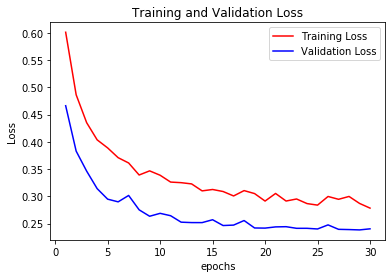

In [35]:
history_dict = history.history #取得history中的所有物件
history_dict.keys()

# 訓練與驗證分數的可視化
loss_values = history_dict['loss'] #取得每輪訓練所得的loss值
val_loss_values = history_dict['val_loss'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(loss_values)+1) #訓練次數1~20

plt.plot(epochs, loss_values, 'r', label='Training Loss') #繪製 training loss 的圖形
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') #繪製 validation loss的圖形
plt.title('Training and Validation Loss') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Loss') #設定y軸名稱為 loss
plt.legend() #設定圖例
plt.show() #顯示圖形

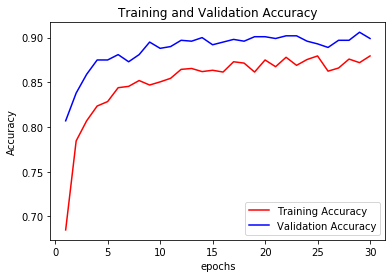

In [36]:
acc_values = history_dict['acc'] #取得每輪訓練所得的loss值
val_acc_values = history_dict['val_acc'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(acc_values)+1) #訓練次數1~20

plt.plot(epochs, acc_values, 'r', label='Training Accuracy') #繪製 training Accuracy 的圖形
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy') #繪製 validation Accuracy的圖形
plt.title('Training and Validation Accuracy') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Accuracy') #設定y軸名稱為 Accuracy
plt.legend() #設定圖例
plt.show() #顯示圖形

In [37]:
# 嘗試微調
conv_base.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
__________

In [38]:
conv_base.trainable = True #解凍 "卷積基底"
set_trainable = False
for layer in conv_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

# 把每一層是否可以被"trainable"的flat打印出來
for layer in conv_base.layers:
    print("{}: {}".format(layer.name, layer.trainable))             

input_2: False
block1_conv1: False
block1_conv2: False
block1_pool: False
block2_conv1: False
block2_conv2: False
block2_pool: False
block3_conv1: False
block3_conv2: False
block3_conv3: False
block3_pool: False
block4_conv1: False
block4_conv2: False
block4_conv3: False
block4_pool: False
block5_conv1: True
block5_conv2: True
block5_conv3: True
block5_pool: True


開始微調網絡。我們將使用非常低的學習率(learning rate)來使用RMSprop優化器。使用低學習率的原因是我們希望限制我們對我們進行微調的3個卷積層表示(representation)所做的修改的大小幅度。太大的更新可能會損害這些表示(representations)。

現在我們開始微調：

In [39]:
model.compile(loss = 'binary_crossentropy', optimizer = RMSprop(lr=2e-5), metrics = ['acc'])
history = model.fit_generator(train_generator, 
                              steps_per_epoch = 100, 
                              epochs = 100, 
                              validation_data = validation_generator, 
                              validation_steps = 50)

Epoch 1/100
100/100 [==============================] - 15s 147ms/step - loss: 0.3380 - acc: 0.8505 - val_loss: 0.3122 - val_acc: 0.8690
Epoch 2/100
100/100 [==============================] - 13s 134ms/step - loss: 0.2676 - acc: 0.8810 - val_loss: 0.1878 - val_acc: 0.9250
Epoch 3/100
100/100 [==============================] - 13s 135ms/step - loss: 0.2400 - acc: 0.8970 - val_loss: 0.2656 - val_acc: 0.9050
Epoch 4/100
100/100 [==============================] - 14s 135ms/step - loss: 0.2135 - acc: 0.9130 - val_loss: 0.1999 - val_acc: 0.9220
Epoch 5/100
100/100 [==============================] - 14s 136ms/step - loss: 0.2095 - acc: 0.9070 - val_loss: 0.1744 - val_acc: 0.9340
Epoch 6/100
100/100 [==============================] - 14s 136ms/step - loss: 0.1571 - acc: 0.9265 - val_loss: 0.3192 - val_acc: 0.9000
Epoch 7/100
100/100 [==============================] - 14s 137ms/step - loss: 0.1676 - acc: 0.9325 - val_loss: 0.2269 - val_acc: 0.9230
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 15s 146ms/step - loss: 0.0228 - acc: 0.9915 - val_loss: 0.3408 - val_acc: 0.9370
Epoch 62/100
100/100 [==============================] - 14s 144ms/step - loss: 0.0222 - acc: 0.9905 - val_loss: 0.4862 - val_acc: 0.9280
Epoch 63/100
100/100 [==============================] - 15s 145ms/step - loss: 0.0355 - acc: 0.9865 - val_loss: 0.3884 - val_acc: 0.9260
Epoch 64/100
100/100 [==============================] - 14s 141ms/step - loss: 0.0172 - acc: 0.9940 - val_loss: 0.3227 - val_acc: 0.9430
Epoch 65/100
100/100 [==============================] - 14s 141ms/step - loss: 0.0332 - acc: 0.9915 - val_loss: 0.2937 - val_acc: 0.9390
Epoch 66/100
100/100 [==============================] - 14s 140ms/step - loss: 0.0176 - acc: 0.9920 - val_loss: 0.4640 - val_acc: 0.9200
Epoch 67/100
100/100 [==============================] - 14s 140ms/step - loss: 0.0391 - acc: 0.9885 - val_loss: 0.2682 - val_acc: 0.9450
Epoch 68/100
100/100 [===================

In [40]:
model.save('cats_and_dogs_small_Fine_Tuning.h5')

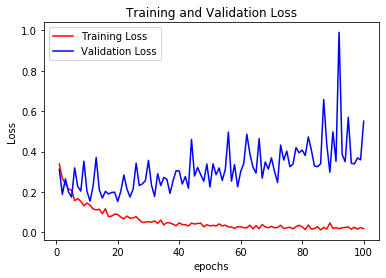

In [41]:
history_dict = history.history #取得history中的所有物件
history_dict.keys()

# 訓練與驗證分數的可視化
loss_values = history_dict['loss'] #取得每輪訓練所得的loss值
val_loss_values = history_dict['val_loss'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(loss_values)+1) #訓練次數1~20

plt.plot(epochs, loss_values, 'r', label='Training Loss') #繪製 training loss 的圖形
plt.plot(epochs, val_loss_values, 'b', label='Validation Loss') #繪製 validation loss的圖形
plt.title('Training and Validation Loss') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Loss') #設定y軸名稱為 loss
plt.legend() #設定圖例
plt.show() #顯示圖形

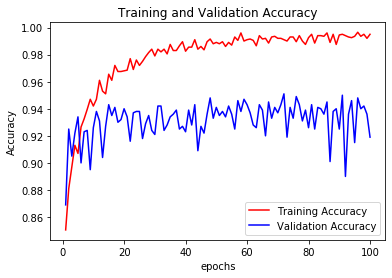

In [42]:
acc_values = history_dict['acc'] #取得每輪訓練所得的loss值
val_acc_values = history_dict['val_acc'] #取得每輪訓練所得的val_loss值

epochs = range(1, len(acc_values)+1) #訓練次數1~20

plt.plot(epochs, acc_values, 'r', label='Training Accuracy') #繪製 training Accuracy 的圖形
plt.plot(epochs, val_acc_values, 'b', label='Validation Accuracy') #繪製 validation Accuracy的圖形
plt.title('Training and Validation Accuracy') #設定圖表名稱
plt.xlabel('epochs') #設定x軸名稱為 epochs
plt.ylabel('Accuracy') #設定y軸名稱為 Accuracy
plt.legend() #設定圖例
plt.show() #顯示圖形

In [43]:
#用測試資料驗證
test_generator = test_datagen.flow_from_directory(test_dir, 
                                                  target_size = (150, 150), 
                                                  batch_size = 20, 
                                                  class_mode = 'binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test_acc:', test_acc)

Found 1000 images belonging to 2 classes.
test_acc: 0.9199999916553497
